In [34]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

file_name = 'C:\car+evaluation\car.data'
col_name=['buying','maint','doors','persons','lug_boot','safety','label']
data = pd.read_csv(file_name, header=None, names=col_name)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['buying']=label.fit_transform(data['buying'])
data['maint']=label.fit_transform(data['maint'])
data['lug_boot']=label.fit_transform(data['lug_boot'])
data['safety']=label.fit_transform(data['safety'])
data['label']=label.fit_transform(data['label'])
data['doors']=label.fit_transform(data['doors'])
data['persons']=label.fit_transform(data['persons'])
data

,buying,maint,doors,persons,lug_boot,safety,label
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


앞서 했던 데이터프레임 짜는 방법을 넣어봤는데 히트맵에 e가 들어가는걸 봐서는 제대로 만든건지 모르겠습니다. 알고싶습니다.

<Axes: title={'center': 'Analyze Correlation of Features'}>

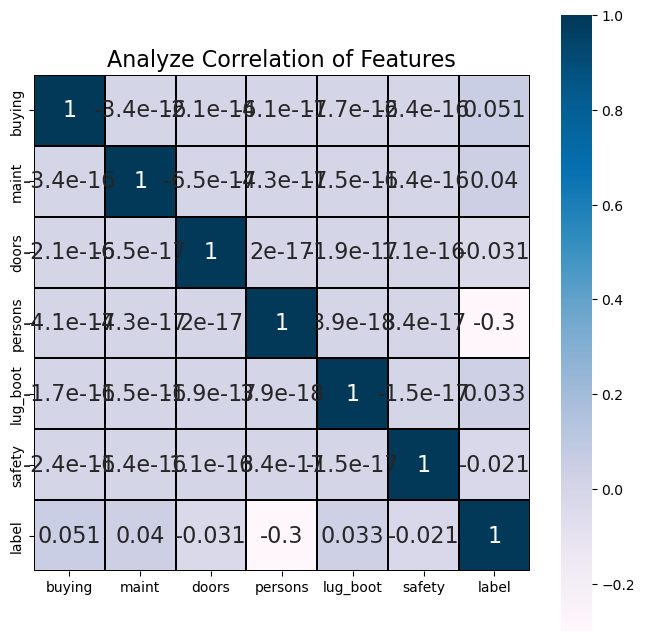

In [35]:
# heatmap
colormap = plt.cm.PuBu
plt.figure(figsize=(8, 8))
plt.title("Analyze Correlation of Features", y = 1.0, size = 16)
sns.heatmap(data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "black", annot = True, annot_kws = {"size" : 16})


In [36]:
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
label       0
dtype: int64

In [37]:
x = data.drop(columns=['label'], axis=1)
y = data['label']

In [38]:
# train & test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1296, 6), (432, 6), (1296,), (432,))

In [39]:
# SVM

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9212962962962963
[[ 82   1  15   1]
 [  7  11   0   3]
 [  2   0 294   0]
 [  5   0   0  11]]


In [40]:
# LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.6550925925925926
[[ 11   0  84   4]
 [  1   0  20   0]
 [ 24   0 269   3]
 [  4   0   9   3]]


In [41]:
# DT

from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9768518518518519
[[ 92   4   3   0]
 [  0  21   0   0]
 [  2   0 294   0]
 [  1   0   0  15]]


In [42]:
# RT

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.9745370370370371
[[ 95   3   1   0]
 [  2  19   0   0]
 [  3   0 293   0]
 [  2   0   0  14]]
